## Regularization 

<ul>
<li>A model will have a low accuracy if it is overfitting. </li>
<li>Overfitting occurs when model is trying too hard to capture the noise (samples that don't represent true pattern)
    in your training dataset.</li>
<li>When model is more flexible, it is prone to overfitting</li>
<li>Regularization shrinks the coefficients (parameter or slops) towards zero to discourages a more complex or flexible model, so as to avoid the risk of overfitting</li>
    <li>Ridge and Lasso are two options </li>
    <li>Regularization strength is provided by parameter <b>alpha</b></li>
</ul>    

In [1]:
# import pandas library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import r2_score

In [2]:
X_train = pd.DataFrame({'sqft':[1000,2000,3500,2455,1800,1550]})
y_train = pd.Series([40,65,100,80,50,55])
X_test = pd.DataFrame({'sqft':[2500,1000,3800,2200] })
y_test = pd.Series([65,50,80,60])

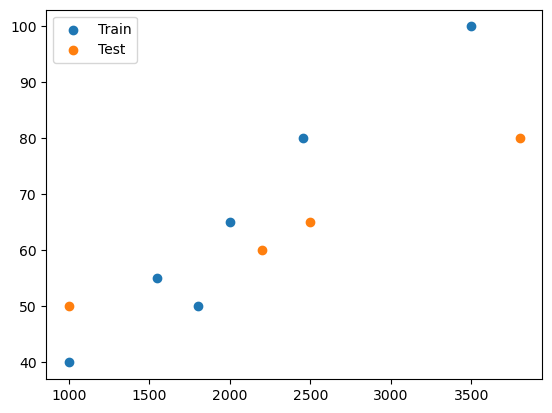

In [3]:
plt.scatter(X_train.sqft, y_train, label='Train')
plt.scatter(X_test.sqft, y_test, label = 'Test')
plt.legend()

### LinearRegression

In [4]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [5]:
lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

LinearRegression()

In [6]:
lr_model.coef_

array([0.02492521])

In [15]:
y_pred = lr_model.predict(X_train)

In [16]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  18.540402526677706
RMSE     :  4.305856770339407
R2 Score :  0.9536489936833057


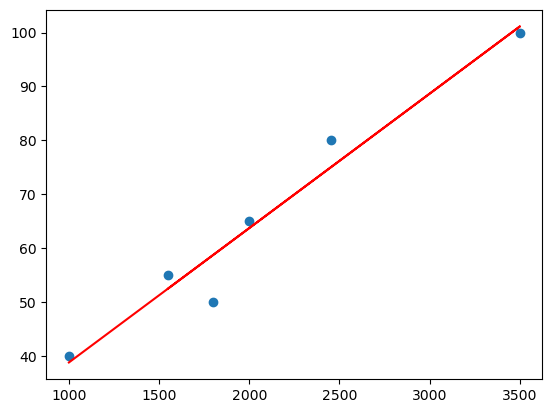

In [17]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred,'r-')

In [10]:
y_pred = lr_model.predict(X_test)

In [11]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

MSE      :  286.119131689681
RMSE     :  16.915056360818934
R2 Score :  -1.4415499237519445


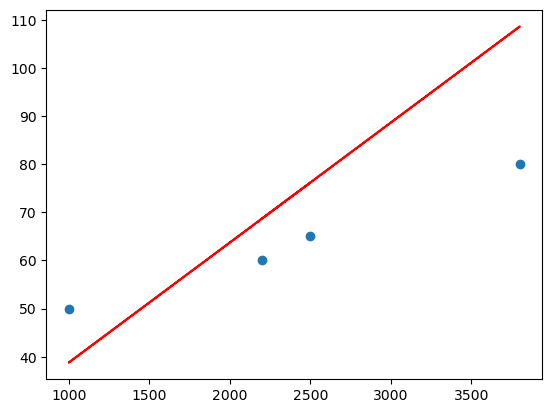

In [12]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred,'r-')

## Ridge Regression (L2)

In [51]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler

In [52]:
ss = StandardScaler()
X_train_scaled = ss.fit_transform(X_train)

In [66]:
ridge = Ridge(alpha=3.0)
ridge.fit(X_train_scaled,y_train)

Ridge(alpha=3.0)

In [67]:
ridge.coef_

array([13.02066046])

In [24]:
y_pred = ridge.predict(X_train)

In [25]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

MSE      :  18.540402526691494
RMSE     :  4.305856770341008
R2 Score :  0.9536489936832713


In [ ]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred)

In [ ]:
y_pred = ridge.predict(X_test)

In [ ]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))

## LassoCV

In [41]:
from sklearn.linear_model import LassoCV

In [45]:
lasso = LassoCV(cv = 3, alphas = [.25, .5,1, 2,4,6])
lasso.fit(X_train,y_train)

LassoCV(alphas=[0.25, 0.5, 1, 2, 4, 6], cv=3)

In [46]:
lasso.coef_

array([0.0249248])

In [47]:
lasso.alpha_

0.25

In [40]:
y_pred = lasso.predict(X_train)

In [ ]:
mse = mean_squared_error(y_train,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_train, y_pred))

In [ ]:
plt.scatter(X_train.sqft,y_train)
plt.plot(X_train.sqft,y_pred)

In [ ]:
y_pred = lasso.predict(X_test)

In [ ]:
plt.scatter(X_test.sqft,y_test)
plt.plot(X_test.sqft,y_pred)

In [ ]:
mse = mean_squared_error(y_test,y_pred)
print("MSE      : ", mse)
print("RMSE     : ", np.sqrt(mse))
print("R2 Score : ", r2_score(y_test, y_pred))